<h1>Adult Income Prediction</h1><br>
The information is a replica of the notes for the abalone dataset from the UCI repository.<br>

<b>1. Sources:</b> <br>
  (a) Original owners of database 
    US Census Bureau. 

  (b) Donor of database  
    Ronny Kohavi and Barry Becker, 
    Data Mining and Visualization 
    Silicon Graphics. 
    e-mail: ronnyk@sgi.com 

  (c) Date received 
    05/19/96 
    
<b>2. Shape of data:</b><br>
   48842 rows and 15 columns
   
<b>3. Number of Attributes: </b><br>
   6 continuous, 8 nominal attributes. 
   
<b>4. Attribute Information:</b> <br>
   <ul>
    <li>age: continuous. </li>
   <li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
   <li>fnlwgt: continuous.</li>
   <li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-    4th,   10th, Doctorate, 5th-6th, Preschool. </li>
   <li>education-num: continuous. </li>
   <li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li> 
   <li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-            op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. </li>
   <li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. </li>
   <li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. </li>
   <li>sex: Female, Male. </li>
   <li>capital-gain: continuous.</li>
   <li>capital-loss: continuous. </li>
   <li>hours-per-week: continuous.</li> 
   <li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,           Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,           France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand,         Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. </li>
   <li>class: >50K, <=50K </li>
   </ul>
<b>5. Missing Attribute Values:</b> <br>
   7% have missing values.
   
<b>6. Class Distribution:</b><br> 
   Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) 
   Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) 

<h2>1.Loading the data</h2>

In [133]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#read data
missing_vals=['?']
data=pd.read_csv('adult.csv',na_values=missing_vals)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [137]:
#count of missing values columnwise
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [138]:
#remove rows containing missing values
data.dropna(axis=0,how='any',inplace=True)

In [139]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


->Data has been loaded and all the rows containing missing values have been removed.<br>
Now the data is free from missing values.

<h2>2.Data preparation</h2>

1.Removing unnecessary columns<br>
2.Standarizing numerical data<br>
3.Encoding categorical features<br>
4.Train test split

In [141]:
#remove fnlwgt column
data.drop('fnlwgt',axis=1,inplace=True)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [142]:
target=data['income']
inputs=data.drop("income",axis=1)

In [143]:
numerical=inputs.select_dtypes(include=['int64','float64'])
numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [144]:
categorical=inputs.select_dtypes(include=['object'])
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States


In [145]:
#standardization of numerical data
from sklearn.preprocessing import StandardScaler
data_num=pd.DataFrame(StandardScaler().fit_transform(numerical),columns=numerical.columns)
data_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [146]:
#encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
data_cat=pd.DataFrame(ohe.fit_transform(categorical),columns=ohe.get_feature_names(categorical.columns))
data_cat.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [147]:
dataset=pd.concat([data_num,data_cat],axis=1)
dataset.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [148]:
#spliting of data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset,\
                                               target,\
                                              test_size=0.25,\
                                              random_state=0)

<h2>3.Train the model</h2>

In [149]:
from warnings import simplefilter
simplefilter(action='ignore')

In [150]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2>4.Prediction</h2>

In [151]:
y_pred = classifier.predict(x_test)

<h2>5.Evaluation</h2>

In [152]:
#using accuracy metric
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8394657703874049

In [153]:
#using confusion metric
con_metrics=metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[7810,  657],
       [1158, 1681]], dtype=int64)

In [154]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      8467
        >50K       0.72      0.59      0.65      2839

    accuracy                           0.84     11306
   macro avg       0.79      0.76      0.77     11306
weighted avg       0.83      0.84      0.83     11306



<h2>Applying RFE(Recurrsive Feature Elimination)</h2>

In [157]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
rfe=RFE(model,5)
rfe=rfe.fit(x_train,y_train)

In [158]:
temp= pd.DataFrame({'Columns' : x_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp

,Columns,Included,Ranking
0,age,False,37
1,educational-num,False,12
2,capital-gain,True,1
3,capital-loss,False,56
4,hours-per-week,False,36
...,...,...,...
98,native-country_Thailand,False,35
99,native-country_Trinadad&Tobago,False,19
100,native-country_United-States,False,50
101,native-country_Vietnam,False,3


In [159]:
imp_col=x_train.columns[rfe.support_]
imp_col

Index(['capital-gain', 'marital-status_Married-civ-spouse',
       'occupation_Priv-house-serv', 'relationship_Own-child',
       'native-country_Mexico'],
      dtype='object')

In [160]:
x_train_new=x_train[imp_col]
x_train_new.head()

,capital-gain,marital-status_Married-civ-spouse,occupation_Priv-house-serv,relationship_Own-child,native-country_Mexico
36418,-0.146733,0.0,0.0,1.0,0.0
1080,-0.146733,0.0,0.0,0.0,0.0
17957,-0.146733,1.0,0.0,0.0,0.0
13607,-0.146733,1.0,0.0,0.0,0.0
43125,-0.146733,0.0,0.0,0.0,0.0


In [161]:
#training the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
#prediction
x_test_new=x_test[imp_col]
y_test_pred=lr.predict(x_test_new)

In [165]:
temp_new=pd.DataFrame({'actual': y_test, 'predicted': y_test_pred})
temp_new

,actual,predicted
44688,<=50K,<=50K
38106,<=50K,<=50K
29131,<=50K,<=50K
31472,>50K,<=50K
45120,<=50K,<=50K
...,...,...
1915,>50K,<=50K
24393,<=50K,<=50K
31714,<=50K,<=50K
34235,<=50K,<=50K


In [166]:
#evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_test_pred))
print( accuracy_score(y_test, y_test_pred))

[[8314  153]
 [2317  522]]
0.7815319299486998


<h2>Applying PCA(Principal Component Analysis)</h2>

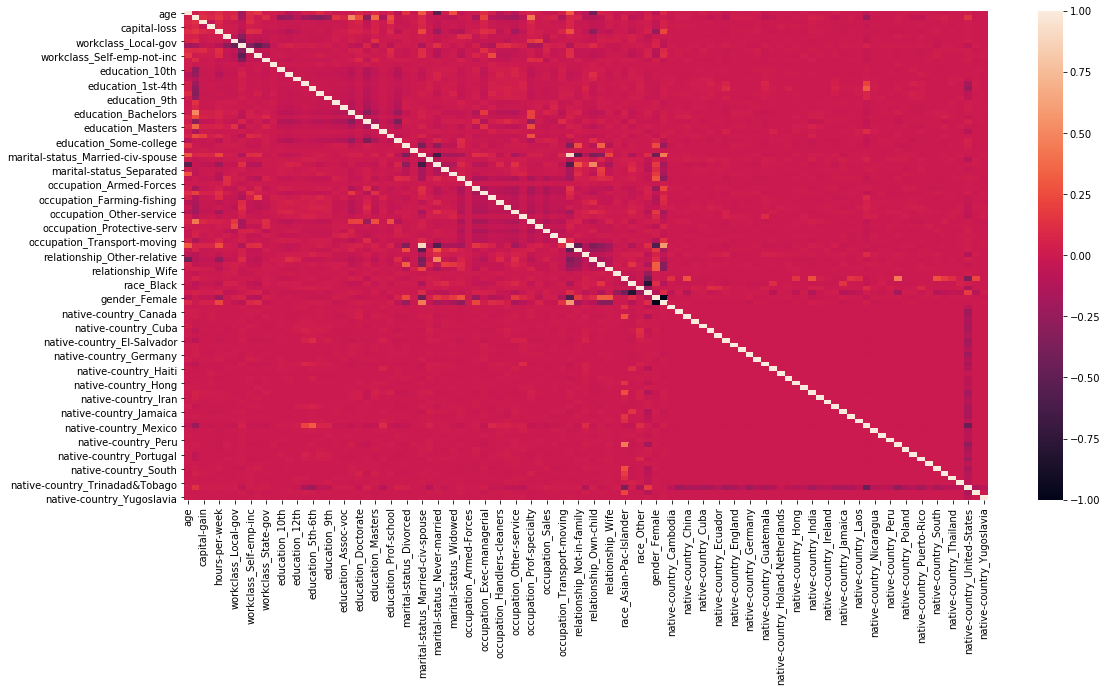

In [167]:
plt.figure(figsize=[18,9])
sns.heatmap(x_train.corr())

In [168]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [169]:
pca = PCA(n_components=8,random_state=0)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [170]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.16798938 0.12090833 0.11022976 0.09730863 0.09171527 0.06620223
 0.03196375 0.02735212]


<h4>1.Using logistic regression</h4>

In [171]:
#training model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
#prediction
y_pred = classifier.predict(X_test)

In [173]:
#evaluation using confusion and accuracy metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print( accuracy_score(y_test, y_pred))


[[7816  651]
 [1261 1578]]
0.8308862550857952


In [174]:
#classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      8467
        >50K       0.71      0.56      0.62      2839

    accuracy                           0.83     11306
   macro avg       0.78      0.74      0.76     11306
weighted avg       0.82      0.83      0.82     11306



<h4>2.Using KNN</h4>

In [175]:
#train the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [176]:
#prediction
y_pred = classifier.predict(X_test)

In [177]:
#evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print( accuracy_score(y_test, y_pred))


[[7674  793]
 [1157 1682]]
0.8275252078542367


In [178]:
#classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      8467
        >50K       0.68      0.59      0.63      2839

    accuracy                           0.83     11306
   macro avg       0.77      0.75      0.76     11306
weighted avg       0.82      0.83      0.82     11306



<h4>3.Using decision trees</h4>

In [179]:
#train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [180]:
#prediction
y_test_pred = classifier.predict(X_test)

In [181]:
#evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print( accuracy_score(y_test, y_pred))

[[7674  793]
 [1157 1682]]
0.8275252078542367


In [182]:
#classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      8467
        >50K       0.68      0.59      0.63      2839

    accuracy                           0.83     11306
   macro avg       0.77      0.75      0.76     11306
weighted avg       0.82      0.83      0.82     11306



<h4>4.Using SVM(support vector machine)</h4>

In [183]:
#training
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
#prediction
y_pred = classifier.predict(X_test)

In [185]:
#evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print( accuracy_score(y_test, y_pred))

[[7961  506]
 [1324 1515]]
0.8381390412170528


In [186]:
#classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      8467
        >50K       0.75      0.53      0.62      2839

    accuracy                           0.84     11306
   macro avg       0.80      0.74      0.76     11306
weighted avg       0.83      0.84      0.83     11306

